In [1]:
# To get the the SQL data, setting the SQL module
import os
import sqlite3
import pandas as pd

In [2]:
# Creae example.db if it exists
if os.path.exists('example.db'):
    os.remove('example.db')

In [3]:
# Create a database
conn = sqlite3.connect('example.db')

In [4]:
# Load some csv data
visits = pd.read_csv('visits.csv')
fitness_tests = pd.read_csv('fitness_tests.csv')
applications = pd.read_csv('applications.csv')
purchases = pd.read_csv('purchases.csv')

In [5]:
# Add the data to our database
visits.to_sql('visits', conn, dtype ={
    'firt_name':'VARCHAR(256)',
    'last_naem':'VARCHAR(256)',
    'email':'VARCHAR(256)',
    'visits_date':'DATE'
})
fitness_tests.to_sql ('fitness_tests', conn, dtype = {
    'firt_name':'VARCHAR(256)',
    'last_naem':'VARCHAR(256)',
    'email':'VARCHAR(256)',
    'gender': 'VARCHAR(256)',
    'fitness_test_date':'DATE'
})
applications.to_sql ('applications', conn, dtype = {
    'firt_name':'VARCHAR(256)',
    'last_naem':'VARCHAR(256)',
    'email':'VARCHAR(256)',
    'gender': 'VARCHAR(256)',
    'application_date':'DATE'
})
purchases.to_sql ('purchases', conn, dtype = {
     'firt_name':'VARCHAR(256)',
    'last_naem':'VARCHAR(256)',
    'email':'VARCHAR(256)',
    'gender': 'VARCHAR(256)',
    'purchases_date':'DATE'
})

In [6]:
# Make a funciton for running SQL queries
def sql_query(query):
    try:
        df = pd.read_sql(query, conn)
    except Exception as e:
        print(e.message)
    return df

In [7]:
# Test the Query 
sql_query('SELECT * FROM visits LIMIT 5')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [8]:
# Test to save the data to a DataFrame
df = sql_query('''
SELECT *
FROM visits 
LIMIT 5
''')

In [9]:
print(df)

   index first_name last_name                          email  gender  \
0      0      Karen   Manning        Karen.Manning@gmail.com  female   
1      1    Annette     Boone               AB9982@gmail.com  female   
2      2   Salvador   Merritt  SalvadorMerritt12@outlook.com    male   
3      3     Martha   Maxwell       Martha.Maxwell@gmail.com  female   
4      4      Andre     Mayer         AndreMayer90@gmail.com    male   

  visit_date  
0     5-1-17  
1     5-1-17  
2     5-1-17  
3     5-1-17  
4     5-1-17  


In [10]:
# Examime visits db
sql_query("""
SELECT *
FROM visits
LIMIT 5;
""")

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [11]:
# Examine fitness_tests db
sql_query("""
SELECT *
FROM fitness_tests
LIMIT 5;
""")

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [12]:
# Examine applications db
sql_query("""
SELECT *
FROM applications
LIMIT 5;
""")

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [13]:
# Examine purchases db
sql_query("""
SELECT *
FROM purchases
LIMIT 5;
""")

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [14]:
# Save all of db data to one DataFrame
# Let's pull data where visit_data is on or after 7-1-17
# Use 'Left Join' commands to combine the four tables
# Joins on 'first_name','last_name', 'email'

sql_query("""
SELECT *
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
LIMIT 5
""")

,index,first_name,last_name,email,gender,visit_date,index,first_name,last_name,email,...,last_name,email,gender,application_date,index,first_name,last_name,email,gender,purchase_date
0,1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,0.0,Kim,Walter,KimWalter58@gmail.com,...,None,None,None,None,NaN,None,None,None,None,None
1,1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,1.0,Tom,Webster,TW3857@gmail.com,...,None,None,None,None,NaN,None,None,None,None,None
2,1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,None,None,None,...,Bowen,Edward.Bowen@gmail.com,male,2017-07-04,39.0,Edward,Bowen,Edward.Bowen@gmail.com,male,2017-07-04
3,1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2.0,Marcus,Bauer,Marcus.Bauer@gmail.com,...,Bauer,Marcus.Bauer@gmail.com,male,2017-07-03,22.0,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-05
4,1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,3.0,Roberta,Best,RB6305@hotmail.com,...,None,None,None,None,NaN,None,None,None,None,None


In [15]:
# Pull the some columns what we need to A/B Test and save it to one DataFrame
df = sql_query('''
SELECT visits.first_name,
       visits.last_name,
       visits.visit_date,
       fitness_tests.fitness_test_date,
       applications.application_date,
       purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
''')

In [16]:
# Invesetigate the A and B Groups
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
# Create new column to use A/B test 
# A: fitness_test_date is not None
# B: fitness_test_date is None
df['ab_test_group'] = df.fitness_test_date.apply(lambda x: 'A' if pd.notnull(x) else 'B')

In [18]:
# Calculate the number of A and B using group by
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


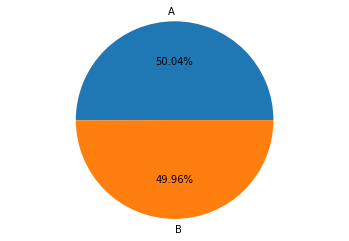

<Figure size 432x288 with 0 Axes>

In [19]:
# Create Pie chart 
plt.pie(ab_counts.first_name.values, labels=['A', 'B'], autopct='%0.2f%%')
plt.axis('equal')
plt.show()
plt.savefig('ab_test_pie_chart.png')